# Guia 3

## Ejercicio 5

En el archivo `te.txt` se encuentra la señal registrada al discar un número telefónico en una línea ruidosa y se requiere determinar el número que se ha discado. La señal se digitalizó con una frecuencia de muestreo de 11025 Hz y se sabe que cada número del teléfono está codificado mediante teclado. De arriba hacia abajo las frecuencias son 697, 770, 852 y 941 Hz; de izquierda a derecha son 1209, 1336, 1477 Hz. Por ejemplo: el número 2 se codifica con la **suma** de dos senos con frecuencias 697 y 1336; el número 7 se codifica con 852 y 1209 Hz. Se necesita determinar el número que se ha discado. (Sugerencia: utilice el producto interno)

### Solución

Para determinar el número se debe ver los intervalos donde se presionó un botón.

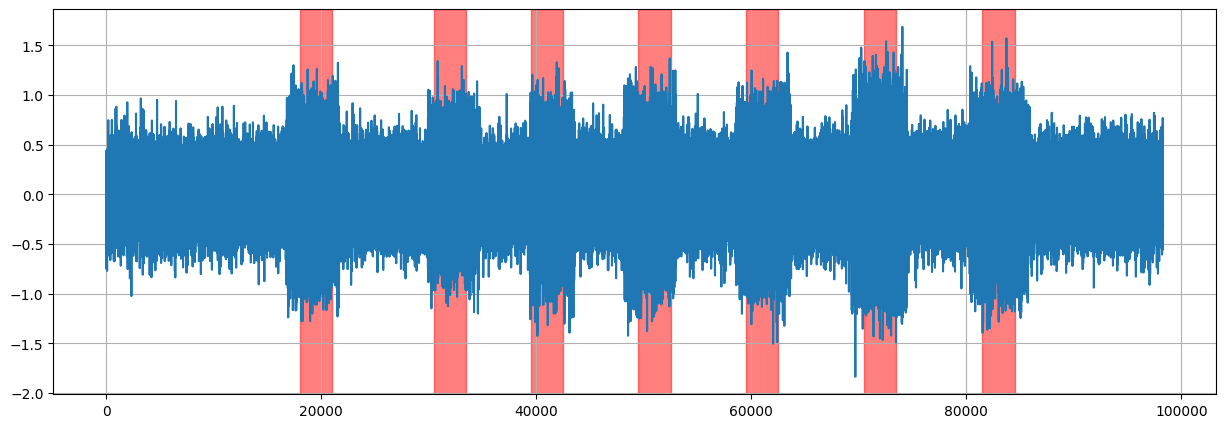

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Leer archivo
telefono = np.loadtxt('te.txt')

# identificar 

# Graficar
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax.grid()

# Zonas de botones
zonas = [
    {'ini':18000, 'fin':21000},
    {'ini':30500, 'fin':33500},
    {'ini':39500, 'fin':42500},
    {'ini':49500, 'fin':52500},
    {'ini':59500, 'fin':62500},
    {'ini':70500, 'fin':73500},
    {'ini':81500, 'fin':84500}
]
for zona in zonas:
    ax.axvspan(zona['ini'], zona['fin'], color='red', alpha=0.5)

ax.plot(telefono)
plt.show()

Una vez que se sabe dónde se presionó el boton, hay que identificar cuál fue. Para identificar el botón simplemente tomamos la fila y columna con mayor producto interno absoluto.

| Hz  | 1209 | 1336 | 1477 |
| --- | ---- | ---- | ---- |
| 697 |    1 |    2 |    3 |
| 770 |    4 |    5 |    6 |
| 852 |    7 |    8 |    9 |
| 941 |    0 |    0 |    0 |

[np.float64(9.754541443498136), np.float64(65.24732725580401), np.float64(2.7728440311045475)]
[np.float64(57.46769182444523), np.float64(7.264960725371957), np.float64(2.3089690769690385), np.float64(7.046257681012478)]
col 1, row 0 = 2
[np.float64(55.840644519696305), np.float64(4.1601951508402255), np.float64(17.02874649026233)]
[np.float64(1.286094652755608), np.float64(39.43382557783125), np.float64(7.360870567934883), np.float64(8.650482735269273)]
col 0, row 1 = 4
[np.float64(10.233850995765653), np.float64(52.48844396667701), np.float64(12.035481418832841)]
[np.float64(44.856378274628966), np.float64(20.668034852162666), np.float64(17.313797910028292), np.float64(1.5710858029905355)]
col 1, row 0 = 2
[np.float64(11.37189188619837), np.float64(75.63122391934786), np.float64(7.518564730816474)]
[np.float64(4.763500581051747), np.float64(7.409365885145824), np.float64(19.726253498633184), np.float64(2.3299122566563772)]
col 1, row 2 = 8
[np.float64(1.9395857647899173), np.float64(

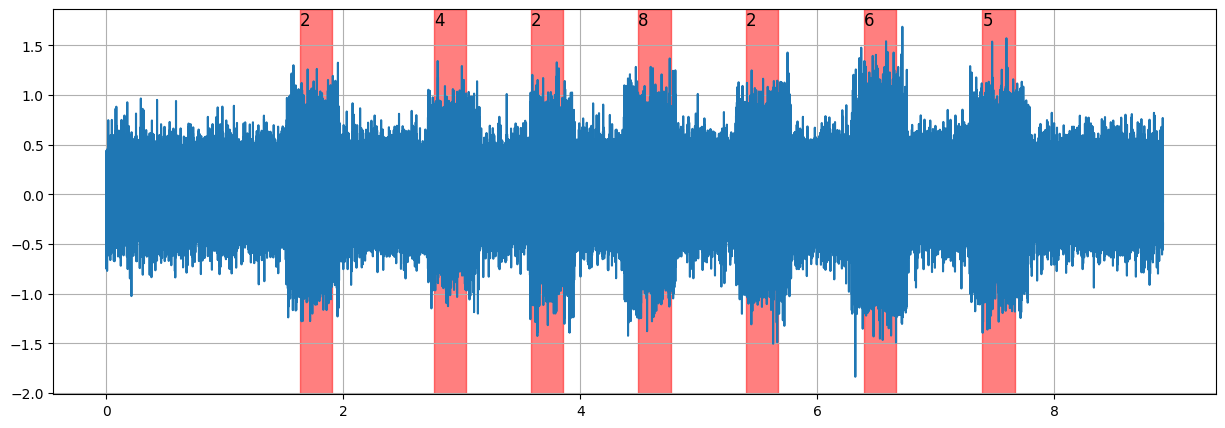

In [2]:
def senoidal(t,fs):
    """Genera senoidal de frecuencia fs"""
    return np.sin(2*np.pi*t*fs)

def productoInterno(x,y):
    """Producto interno entre las seniales x e y"""
    # Verificar que tengan la misma longitud
    if(len(x) != len(y)):
        raise Exception('Las seniales no son del mismo tamanio')

    return np.sum(np.multiply(x,np.conjugate(y)))

def identificar(t,s):
    # columna
    prodi = [
        np.abs(productoInterno(s,senoidal(t,1209))),
        np.abs(productoInterno(s,senoidal(t,1336))),
        np.abs(productoInterno(s,senoidal(t,1477)))
    ]
    i = np.argmax(prodi)

    # fila
    prodj = [
        np.abs(productoInterno(s,senoidal(t,697))),
        np.abs(productoInterno(s,senoidal(t,770))),
        np.abs(productoInterno(s,senoidal(t,852))),
        np.abs(productoInterno(s,senoidal(t,941)))
    ]
    j = np.argmax(prodj)

    # devolver valor. 0 si es la ultima fila, si no col+1+fila*j
    print(prodi)
    print(prodj)
    print(f"col {i}, row {j} = {0 if j == 3 else i+1+3*j}")
    return 0 if j == 3 else i+1+3*j

# Parametros
fm = 11025
Tini = 0
Tfin = len(telefono)/fm

t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)

# Identificar botones
for zona in zonas:
    subt = t[zona['ini']:zona['fin']]
    subtel = telefono[zona['ini']:zona['fin']]
    boton = identificar(subt,subtel)
    zona['boton'] = boton

# Graficar
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax.grid()

for zona in zonas:
    ax.axvspan(t[zona['ini']], t[zona['fin']], color='red', alpha=0.5)
    ax.text(t[zona['ini']], 1.7, zona['boton'], fontsize=12, transform=ax.transData)
ax.plot(t,telefono)
plt.show()